In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
MD_data = pd.read_csv('/Users/nyahamlet/Documents/Business/Certs/VT Data Analytics Bootcamp/Capstone Project/Final/MD_Housing_Data.csv')

In [3]:
MD_data.head()

,State,County,Year,Annual_Change,HPI,White,Black,American_Indian_Alaska_Native,American_Indian_Alaska_Native_Cherokee,American_Indian_Alaska_Native_Chippewa,...,Asian_Japanese,Asian_Korean,Asian_Vietnamese,Other_Asian,Native_Hawaiian_Other_Pac_Islander,Native_Hawaiian_Other_Pac_Islander_Native_Hawaiian,Native_Hawaiian_Other_Pac_Islander_Chamorro,Native_Hawaiian_Other_Pac_Islander_Samoan,Some_other_race,Two_or_more_races
0,Maryland,Allegany County,2015,0.72,234.89,62420,5954,117,18,2,...,3,24,119,116,6,2,3,1,163,1668
1,Maryland,Allegany County,2016,-0.29,234.22,62420,5954,117,18,2,...,3,24,119,116,6,2,3,1,163,1668
2,Maryland,Allegany County,2017,4.52,244.79,62420,5954,117,18,2,...,3,24,119,116,6,2,3,1,163,1668
3,Maryland,Allegany County,2018,-1.57,240.95,62420,5954,117,18,2,...,3,24,119,116,6,2,3,1,163,1668
4,Maryland,Allegany County,2019,4.14,250.92,62420,5954,117,18,2,...,3,24,119,116,6,2,3,1,163,1668


In [4]:
MD_data2 = MD_data[["State", "County", "Annual_Change", "HPI", "Asian", "Black", "White", "Some_other_race", "Two_or_more_races"]]

In [5]:
MD_data2.head()

,State,County,Annual_Change,HPI,Asian,Black,White,Some_other_race,Two_or_more_races
0,Maryland,Allegany County,0.72,234.89,674,5954,62420,163,1668
1,Maryland,Allegany County,-0.29,234.22,674,5954,62420,163,1668
2,Maryland,Allegany County,4.52,244.79,674,5954,62420,163,1668
3,Maryland,Allegany County,-1.57,240.95,674,5954,62420,163,1668
4,Maryland,Allegany County,4.14,250.92,674,5954,62420,163,1668


In [6]:
MD_data3 = MD_data2[MD_data2["County"].isin(['Caroline County','Dorchester County',"Prince George's County",'Wicomico County', 'Worcester County'])]

In [7]:
MD_data3.head()

,State,County,Annual_Change,HPI,Asian,Black,White,Some_other_race,Two_or_more_races
24,Maryland,Caroline County,0.56,174.59,170,4589,26076,1050,1281
25,Maryland,Caroline County,4.10,181.74,170,4589,26076,1050,1281
26,Maryland,Caroline County,4.60,190.10,170,4589,26076,1050,1281
27,Maryland,Caroline County,4.82,199.28,170,4589,26076,1050,1281
28,Maryland,Caroline County,1.71,202.68,170,4589,26076,1050,1281


In [8]:
MD_data3.corr()

,Annual_Change,HPI,Asian,Black,White,Some_other_race,Two_or_more_races
Annual_Change,1.000000,0.368686,0.371167,0.371874,0.349016,0.372032,0.371437
HPI,0.368686,1.000000,0.936138,0.929027,0.951434,0.921613,0.934436
Asian,0.371167,0.936138,1.000000,0.999384,0.956251,0.998102,0.999802
Black,0.371874,0.929027,0.999384,1.000000,0.945945,0.999627,0.999693
White,0.349016,0.951434,0.956251,0.945945,1.000000,0.937942,0.951030
Some_other_race,0.372032,0.921613,0.998102,0.999627,0.937942,1.000000,0.998676
Two_or_more_races,0.371437,0.934436,0.999802,0.999693,0.951030,0.998676,1.000000


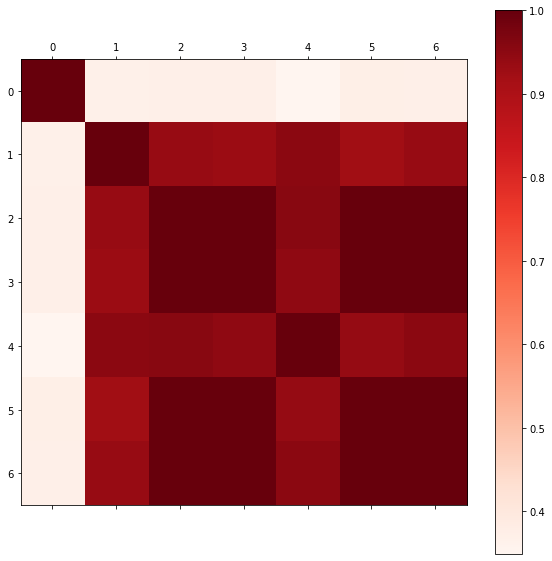

In [9]:
correlations = MD_data3.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
#plt.matshow(MD_data3.corr())
#plt.colorbar()
#fig = plt.figure(figsize=(10,10))
plt.imshow(correlations, cmap=plt.get_cmap('Reds'))
plt.colorbar()
#fig.colorbar(cax)
#ticks = np.arange(0,6,1)